p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MASPpepK VS adjuvant vs. NGP24h VS adjuvant: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.250e-59 U_stat=7.394e+04
NGP24h VS adjuvant vs. MASPpepK + NGP24h VS adjuvant: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.494e-52 U_stat=2.424e+05
MASPpepK VS adjuvant vs. MASPpepK + NGP24h VS adjuvant: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.398e-03 U_stat=1.415e+05


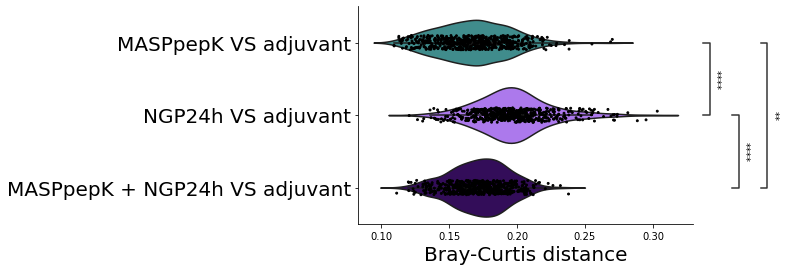

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

# read data and subset data.
dunn_data = pandas.read_csv('pos-distance-data.csv')
adj_to_other = dunn_data[dunn_data["group_name"].isin(['MASPpepK VS adjuvant', 'NGP24h VS adjuvant', 'MASPpepK + NGP24h VS adjuvant'])]

plt.rc('ytick',labelsize=20)

order = ['MASPpepK VS adjuvant',
         'NGP24h VS adjuvant',
         'MASPpepK + NGP24h VS adjuvant']

palette_color = {'MASPpepK VS adjuvant': '#339999','NGP24h VS adjuvant': '#AA66FF','MASPpepK + NGP24h VS adjuvant': '#330066'}

plot_1 = sns.violinplot(y=adj_to_other['group_name'] , x=adj_to_other['Distance'], showfliers = False, order = order, palette=palette_color)
plot_1 = sns.stripplot(y=adj_to_other['group_name'] , x=adj_to_other['Distance'], order = order, color = "black", size=2, edgecolor="black", linewidth=.9)
annot_1 = Annotator(plot_1,[("MASPpepK VS adjuvant", "NGP24h VS adjuvant"),
                            ("MASPpepK VS adjuvant", "MASPpepK + NGP24h VS adjuvant"),
                            ("NGP24h VS adjuvant", "MASPpepK + NGP24h VS adjuvant")], y=adj_to_other['group_name'] , x=adj_to_other['Distance'], order=order, orient='h')
annot_1.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
annot_1.apply_test()
plot_1, test_results = annot_1.annotate()
plot_1.spines['top'].set_visible(False)
plot_1.spines['right'].set_visible(False)
plot_1.set_title("")
plot_1.set_xlabel('Bray-Curtis distance', fontsize = 20)
plot_1.set_ylabel('')
#plt.rc('ytick')
#plot_1.set_xlim([0, 0.5])
plt.savefig("pos_dunn_test_adj_to_other.png", dpi=300, bbox_inches='tight')